In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sys import getsizeof

### Load results files

In [2]:
with open('./results/det_counter.json', 'r') as f: 
    det_results = json.load(f)    

In [3]:
getsizeof(det_results)

232

Portuguese has more letters (18% more than English), followed by French.

### Convert results to numpy format

In [4]:
def dict_to_np(dic):
    n_rows = len(dic['pt'])
    try:
        n_cols = len(dic['pt']['A'])
    except TypeError:
        n_cols = 1
    results = dict()
    
    for lang in ('pt', 'en', 'fr'):
        results[lang] = np.zeros((n_rows, n_cols), dtype='int')
        for i, key in enumerate(sorted(dic[lang].keys())):
            results[lang][i,:] = dic[lang][key]
        
    return results

In [5]:
det_results = dict_to_np(det_results)

## Total number of letters

In [6]:
n_letters_pt = sum(det_results['pt'][:,0])
n_letters_pt

278239

In [7]:
n_letters_en = sum(det_results['en'][:,0])
n_letters_en

235645

In [8]:
n_letters_fr = sum(det_results['fr'][:,0])
n_letters_fr

266484

In [9]:
n_letters = {
    'en': n_letters_en,
    'pt': n_letters_pt,
    'fr': n_letters_fr
}

In [10]:
n_letters_en / n_letters_fr

0.884274478017442

In [11]:
n_letters_en / n_letters_pt

0.8469157810371659

In [12]:
n_letters_pt / n_letters_fr

1.0441114663544528

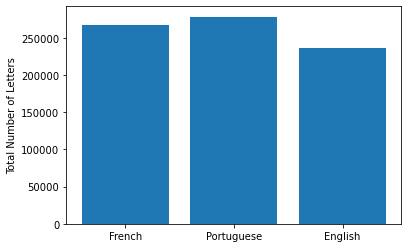

In [13]:
plt.bar(('French', 'Portuguese', 'English'), (n_letters_fr, n_letters_pt, n_letters_en));
ax = plt.gca()
ax.set_ylabel('Total Number of Letters');

## Letter frequencies

Compare with https://pt.wikipedia.org/wiki/Frequ%C3%AAncia_de_letras

In [14]:
ord_A = ord('A')
letter_labels = [chr(i) for i in range(ord_A, ord_A+26)]

In [15]:
def print_max_freqs(results, lang, n=5, compare=None):
    max_idxs = (-results[lang]).ravel().argsort()[:n]
    _aux_print(max_idxs, results, lang, n, compare)    

def print_min_freqs(results, lang, n=5, compare=None):
    min_idxs = (results[lang]).ravel().argsort()[:n]
    _aux_print(min_idxs, results, lang, n, compare)
    
def _aux_print(idxs, results, lang, n=5, compare=None):
    for idx in idxs:
        cts = int(results[lang][idx])
        freq = cts/n_letters[lang]
        print(f'{letter_labels[idx]} {cts:6}  {freq:.4f}', end='')
        if compare:
            teo = det_results[lang][idx]
            rel_er = float(abs(cts - teo)/teo)
            print(f'  real: {int(teo):7}, rel. error: {rel_er:.4f}')
        else:
            print()

In [16]:
def plot_abs_freqs(results, lang, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
        
    ax.bar(letter_labels, results[lang].ravel())
    ax.set_ylabel('Absolute Frequency')
    
    return fig, ax
    
def plot_rel_freqs(results, lang, compare=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    
    if compare == 'real':
        x = np.arange(len(letter_labels))  # the label locations
        width = 0.35  # the width of the bars
        ax.bar(x - width/2, results[lang].ravel()/n_letters[lang], width, label='Sample Text')
        ax.bar(x + width/2, real_freqs[lang], width, label='Expected')        
        ax.set_xticks(x, letter_labels)
        ax.legend()
    elif compare == 'det':
        x = np.arange(len(letter_labels))  # the label locations
        width = 0.35  # the width of the bars
        ax.bar(x + width/2, det_results[lang].ravel()/n_letters[lang], width, label='Real value')
        ax.bar(x - width/2, results[lang].ravel()/np.sum(results[lang]), width, label='Estimation')        
        ax.set_xticks(x, letter_labels)
        ax.legend()
    else:
        ax.bar(letter_labels, results[lang].ravel()/n_letters[lang])
        
        
    ax.set_xlabel('Letter')
    ax.set_ylabel('Relative Frequency')

    return fig, ax

In [17]:
real_freqs = {}
real_freqs['pt'] = np.array([14.63, 1.04, 3.88, 4.99, 12.57, 1.02, 1.3, 1.28, 6.18, 0.4, 
                             0.02, 2.78, 4.74, 5.05, 10.73, 2.52, 1.2, 6.53, 7.81, 4.34, 
                             4.63, 1.67, 0.01, 0.21, 0.01, 0.47])/100
real_freqs['en'] = np.array([8.167, 1.492, 2.782, 4.253, 12.702, 2.228, 2.015, 6.094, 6.966, 
                             0.153, 0.772, 4.025, 2.406, 6.749, 7.507, 1.929, 0.095, 5.987, 
                             6.327, 9.056, 2.758, 0.978, 2.36, 0.15, 1.974, 0.074])/100
real_freqs['fr'] = np.array([7.636+0.486, 0.901, 3.26+0.075, 3.669, 14.715+0.271+1.904+0.225, 
                             1.066, 0.866, 0.737, 7.529+0.045+0.005, 0.545, 
                             0.049, 5.456, 2.968, 7.095, 5.378, 3.021, 1.362, 6.553, 
                             7.948, 7.244, 6.311+0.058, 1.628, 0.114, 0.387, 0.308, 0.136])/100

#### Comparison

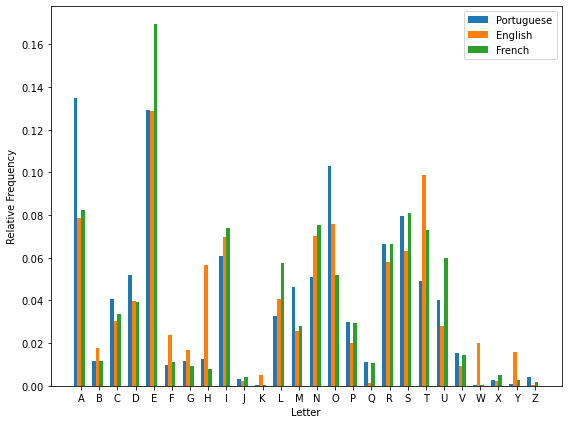

In [18]:
x = np.arange(len(letter_labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - 0.3, det_results['pt'][:,0]/n_letters_pt, width, label='Portuguese')
rects2 = ax.bar(x - 0.1, det_results['en'][:,0]/n_letters_en, width, label='English')
rects3 = ax.bar(x + 0.1, det_results['fr'][:,0]/n_letters_fr, width, label='French')

ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Letter')
ax.set_xticks(x, letter_labels)
ax.legend()

fig.tight_layout()

fig.savefig('./results/plots/01_languages_comparison.png', dpi=300)

#### Portuguese

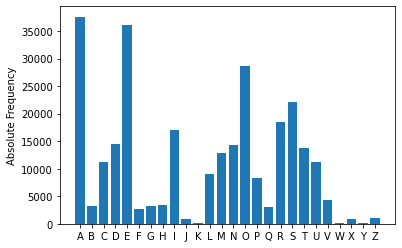

In [19]:
fig, _ = plot_abs_freqs(det_results, 'pt')

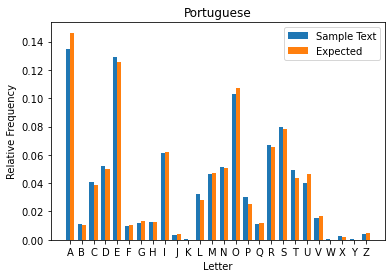

In [20]:
fig, ax = plot_rel_freqs(det_results, 'pt', compare='real')
ax.set_title('Portuguese');
fig.savefig('./results/plots/02_expected_compar_pt', dpi=300)

In [21]:
print_max_freqs(det_results, 'pt')
# AEOSR -> equal

A  37584  0.1351
E  36029  0.1295
O  28623  0.1029
S  22100  0.0794
R  18555  0.0667


In [22]:
print_min_freqs(det_results, 'pt')
# YWKXJ -> same letters, slightly different order

K     73  0.0003
W    100  0.0004
Y    214  0.0008
X    813  0.0029
J    849  0.0031


#### English

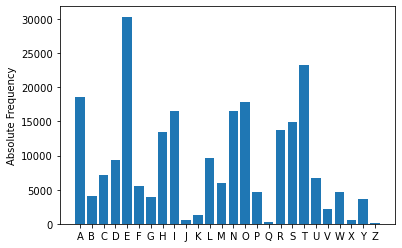

In [23]:
fig, _ = plot_abs_freqs(det_results, 'en')

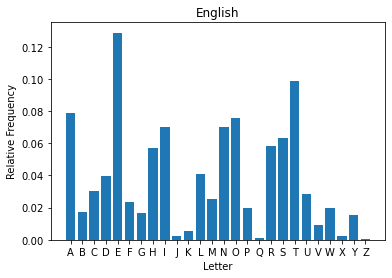

In [24]:
fig, ax = plot_rel_freqs(det_results, 'en', compare=True)
ax.set_title('English');
fig.savefig('./results/plots/02_expected_compar_en', dpi=300)

In [25]:
print_max_freqs(det_results, 'en', n=6)
# ETAOI N -> same letters, slightly different order

E  30350  0.1288
T  23325  0.0990
A  18575  0.0788
O  17888  0.0759
N  16591  0.0704
I  16470  0.0699


In [26]:
print_min_freqs(det_results, 'en')
# ZQXJK -> same letters, slightly different order

Z    124  0.0005
Q    319  0.0014
J    520  0.0022
X    544  0.0023
K   1243  0.0053


#### French

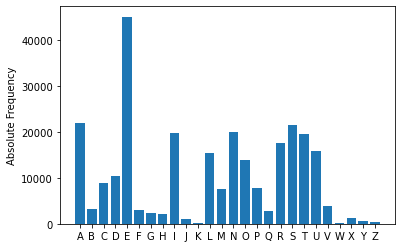

In [27]:
fig, _ = plot_abs_freqs(det_results, 'fr')

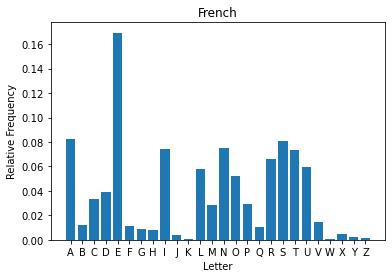

In [28]:
fig, ax = plot_rel_freqs(det_results, 'fr', compare=True)
ax.set_title('French')
fig.savefig('./results/plots/02_expected_compar_fr', dpi=300)

In [29]:
print_max_freqs(det_results, 'fr', n=6)
# EASIT N -> same letters, slightly different order

E  45127  0.1693
A  21969  0.0824
S  21579  0.0810
N  20058  0.0753
I  19715  0.0740
T  19480  0.0731


In [30]:
print_min_freqs(det_results, 'fr', n=6)
# KWZYX J -> same letters, slightly different order

K     81  0.0003
W    104  0.0004
Z    441  0.0017
Y    702  0.0026
J   1039  0.0039
X   1351  0.0051


## Fixed probability counter

In [31]:
with open('./results/fix_prob_counter_x1000.json', 'r') as f: 
    fix_prob_results = json.load(f)   
fix_results = dict_to_np(fix_prob_results)

In [32]:
with open('./results/fix_prob_counter_x100.json', 'r') as f: 
    fix_prob_results = json.load(f)    
fix_results_100 = dict_to_np(fix_prob_results)

### Distributions

In [33]:
sample = fix_results['pt'][0,:]  # counts of A in PT
sample.shape

(1000,)

In [34]:
min(sample), max(sample)

(2185, 2482)

In [35]:
np.mean(sample), np.std(sample)

(2348.115, 47.31895788159329)

In [36]:
sample_100 = fix_results_100['pt'][0,:]  # counts of A in PT
sample_100.shape

(100,)

In [37]:
min(sample_100), max(sample_100)

(2253, 2461)

In [38]:
np.mean(sample_100), np.std(sample_100)

(2346.71, 45.03960368386916)

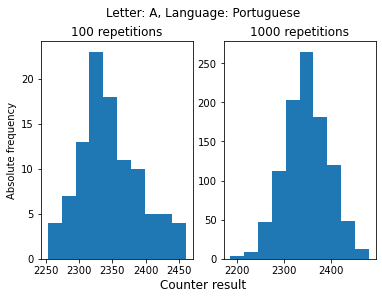

In [39]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Letter: A, Language: Portuguese', y=1)
axes[0].hist(sample_100)
axes[0].set_ylabel('Absolute frequency')
axes[0].set_title('100 repetitions')
axes[1].hist(sample);
axes[1].set_title('1000 repetitions')
fig.supxlabel('Counter result');

fig.savefig('./results/plots/03_fix_dist_A', dpi=300)

In [40]:
idx_K = ord('K')-ord('A')
sample2 = fix_results['pt'][idx_K,:]  # counts of K in PT

In [41]:
min(sample2), max(sample2)

(0, 11)

In [42]:
np.mean(sample2), np.std(sample2)

(4.684, 2.165212229782568)

In [43]:
sample2_100 = fix_results_100['pt'][idx_K,:]  # counts of K in PT

In [44]:
min(sample2_100), max(sample2_100)

(1, 9)

In [45]:
np.mean(sample2_100), np.std(sample2_100)

(4.43, 1.8614779074702983)

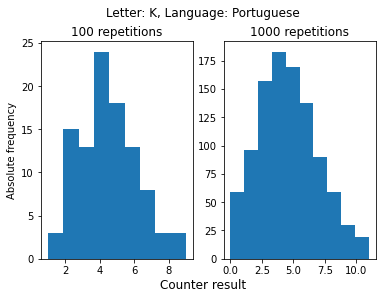

In [46]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Letter: K, Language: Portuguese', y=1)
axes[0].hist(sample2_100, bins=9)
axes[0].set_ylabel('Absolute frequency')
axes[0].set_title('100 repetitions')
axes[1].hist(sample2);
axes[1].set_title('1000 repetitions')
fig.supxlabel('Counter result');

fig.savefig('./results/plots/03_fix_dist_K', dpi=300)

### Expected values

In [47]:
fix_expect = {}
for lang in ('pt', 'en', 'fr'):
    fix_expect[lang] = fix_results[lang].mean(axis=1)

In [48]:
teo_fix_expect = {}
for lang in ('pt', 'en', 'fr'):
    teo_fix_expect[lang] = det_results[lang] / 16

In [49]:
def plot_expected_values(res, teo, lang):
    max_idxs = (-res[lang]).ravel().argsort()
    fig, ax = plt.subplots()
    ax.scatter(range(26), res[lang][max_idxs], label='Results')
    ax.plot(range(26), teo[lang][max_idxs], 'k--', label='Theoretical')
    ax.set_ylabel('Log of expected value')
    ax.set_yscale('log')
    ax.get_xaxis().set_visible(False)
    ax.legend()
    
    return fig, ax

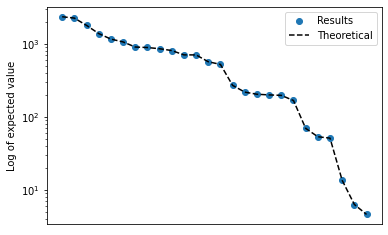

In [50]:
fig, _ = plot_expected_values(fix_expect, teo_fix_expect, 'pt')
fig.savefig('./results/plots/04_fix_expected_pt')

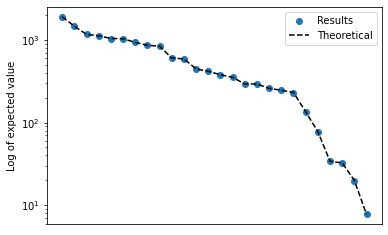

In [51]:
fig, _ = plot_expected_values(fix_expect, teo_fix_expect, 'en')
fig.savefig('./results/plots/04_fix_expected_en')

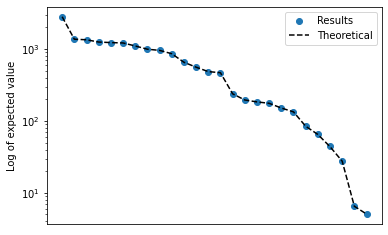

In [52]:
fig, _ = plot_expected_values(fix_expect, teo_fix_expect, 'fr')
fig.savefig('./results/plots/04_fix_expected_fr')

### Tables

In [53]:
def create_fix_table(results, lang, n=5):        
    data = {
        'Letter': letter_labels,
        'Exact counts': det_results[lang].ravel(),
        'Average estimate': np.mean(results[lang], axis=1) * 16, 
        'Minimum estimate': np.min(results[lang], axis=1) * 16,
        'Maximum estimate': np.max(results[lang], axis=1) * 16,
        'Standard deviation': np.std(results[lang] * 16, axis=1),        
    }    
    
    df = pd.DataFrame(data)
    df['Average relative error'] = np.abs(df['Average estimate'] - df['Exact counts'])/df['Exact counts'] * 100
    df['Maximum relative error'] = np.max((np.abs(df['Minimum estimate'] - df['Exact counts'])/df['Exact counts'],
                                           np.abs(df['Maximum estimate'] - df['Exact counts'])/df['Exact counts']), 
                                           axis=0) * 100
    
    return df
        

In [54]:
df_pt = create_fix_table(fix_results, 'pt')

In [55]:
df_pt = df_pt.sort_values(by='Average estimate', ascending=False)
df_pt

,Letter,Exact counts,Average estimate,Minimum estimate,Maximum estimate,Standard deviation,Average relative error,Maximum relative error
0,A,37584,37569.840,34960,39712,757.103326,0.037676,6.981694
4,E,36029,36029.968,33296,38416,754.474036,0.002687,7.585556
14,O,28623,28642.320,26592,31520,643.988368,0.067498,10.121231
18,S,22100,22098.144,19680,24096,585.668202,0.008398,10.950226
17,R,18555,18551.568,16768,20656,538.199968,0.018496,11.323094
8,I,16980,16998.880,15296,18480,498.064118,0.111190,9.917550
3,D,14444,14442.048,12896,15984,476.925518,0.013514,10.717253
13,N,14216,14235.280,13024,15584,474.705190,0.135622,9.622960
19,T,13684,13670.512,12368,15312,439.601667,0.098568,11.897106
12,M,12923,12938.544,11584,14320,444.557263,0.120282,10.810183


In [56]:
idxs = np.r_[0:5, -5:0]
df_pt.iloc[idxs]

,Letter,Exact counts,Average estimate,Minimum estimate,Maximum estimate,Standard deviation,Average relative error,Maximum relative error
0,A,37584,37569.840,34960,39712,757.103326,0.037676,6.981694
4,E,36029,36029.968,33296,38416,754.474036,0.002687,7.585556
14,O,28623,28642.320,26592,31520,643.988368,0.067498,10.121231
18,S,22100,22098.144,19680,24096,585.668202,0.008398,10.950226
17,R,18555,18551.568,16768,20656,538.199968,0.018496,11.323094
9,J,849,851.344,528,1216,112.086046,0.276090,43.227326
23,X,813,803.984,496,1168,113.598872,1.108979,43.665437
24,Y,214,213.424,64,416,54.901405,0.269159,94.392523
22,W,100,99.424,0,240,38.679662,0.576000,140.000000
10,K,73,74.944,0,176,34.643396,2.663014,141.095890


In [57]:
with open('./results/tables/fix_table_short_pt.tex', 'w') as f:
    (df_pt.iloc[idxs]).to_latex(f, float_format="{:0.2f}".format, index=False)

In [58]:
with open('./results/tables/fix_table_pt.tex', 'w') as f:
    df_pt.to_latex(f, float_format="{:0.2f}".format, index=False)

In [59]:
df_en = create_fix_table(fix_results, 'en')
df_en = df_en.sort_values(by='Average estimate', ascending=False)
df_en

,Letter,Exact counts,Average estimate,Minimum estimate,Maximum estimate,Standard deviation,Average relative error,Maximum relative error
4,E,30350,30339.008,28048,32384,669.756762,0.036217,7.584843
19,T,23325,23311.424,21696,25200,576.384473,0.058204,8.038585
0,A,18575,18576.128,16704,20288,519.791696,0.006073,10.072678
14,O,17888,17899.568,16304,19552,512.677120,0.064669,9.302326
13,N,16591,16562.704,14624,17984,491.601253,0.170550,11.855825
8,I,16470,16482.400,14736,18160,476.551210,0.075288,10.528233
18,S,14875,14872.976,13648,16352,457.596721,0.013607,9.929412
17,R,13723,13718.736,11920,15552,447.041191,0.031072,13.327990
7,H,13382,13396.720,12064,14640,451.821976,0.109999,9.849051
11,L,9637,9644.256,8592,10992,376.617448,0.075293,14.060392


In [60]:
with open('./results/tables/fix_table_en.tex', 'w') as f:
    df_en.to_latex(f, float_format="{:0.2f}".format, index=False)

In [61]:
df_fr = create_fix_table(fix_results, 'fr')
df_fr = df_fr.sort_values(by='Average estimate', ascending=False)
df_fr

,Letter,Exact counts,Average estimate,Minimum estimate,Maximum estimate,Standard deviation,Average relative error,Maximum relative error
4,E,45127,45115.648,42528,47760,817.521721,0.025156,5.834644
0,A,21969,21972.576,20208,23920,565.412519,0.016277,8.880696
18,S,21579,21535.968,19584,23216,582.638192,0.199416,9.245099
13,N,20058,20057.312,18352,21680,543.445665,0.003430,8.505335
8,I,19715,19711.728,17824,21520,551.992281,0.016597,9.591681
19,T,19480,19476.464,17760,21232,540.103968,0.018152,8.993840
17,R,17698,17677.824,16128,19136,495.108749,0.114002,8.871059
20,U,15944,15943.040,14128,17280,502.293084,0.006021,11.389865
11,L,15359,15359.184,13744,16768,492.043679,0.001198,10.515007
14,O,13799,13810.864,12176,15456,464.360952,0.085977,12.008117


In [62]:
with open('./results/tables/fix_table_fr.tex', 'w') as f:
    df_fr.to_latex(f, float_format="{:0.2f}".format, index=False)

### Analyze top and bottom leters

In [63]:
fix_estim = {}
for lang in ('pt', 'en', 'fr'):
    fix_estim[lang] = fix_results[lang][:,0]*16

In [64]:
def print_max_freqs(results, lang, n=5, compare=None):
    max_idxs = (-results[lang]).ravel().argsort()[:n]
    for idx in max_idxs:
        cts = int(results[lang][idx])
        freq = cts/n_letters[lang]
        print(f'{letter_labels[idx]} {cts:6}  {freq:.4f}', end='')
        if compare:
            print(f'  real: {int(det_results[lang][idx])}')
        else:
            print()
        
def print_min_freqs(results, lang, n=5, compare=None):
    min_idxs = (results[lang]).ravel().argsort()[:n]
    for idx in min_idxs:
        cts = int(results[lang][idx])
        freq = cts/n_letters[lang]
        print(f'{letter_labels[idx]} {cts:6}  {freq:.4f}', end='')
        if compare:
            print(f'  real: {int(det_results[lang][idx])}')
        else:
            print()

In [65]:
print_max_freqs(fix_estim, 'pt', compare='det')

A  37008  0.1330  real: 37584
E  36320  0.1305  real: 36029
O  28912  0.1039  real: 28623
S  21536  0.0774  real: 22100
R  17664  0.0635  real: 18555


In [66]:
print_min_freqs(fix_estim, 'pt', n=5, compare='det')

W     64  0.0002  real: 100
K     64  0.0002  real: 73
Y    224  0.0008  real: 214
X    560  0.0020  real: 813
J    976  0.0035  real: 849


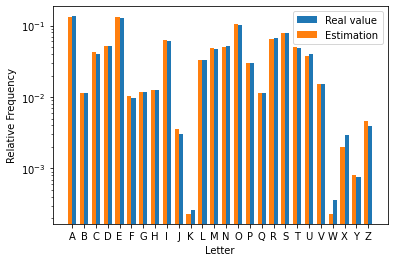

In [67]:
fig, ax = plot_rel_freqs(fix_estim, 'pt', compare='det')
ax.set_yscale('log')
fig.savefig('./results/plots/05_fix_estim_compar_pt', dpi=300)

In [68]:
print_max_freqs(fix_estim, 'en', n=6, compare='det')

E  31264  0.1327  real: 30350
T  23056  0.0978  real: 23325
A  18400  0.0781  real: 18575
O  17136  0.0727  real: 17888
I  16464  0.0699  real: 16470
N  16224  0.0688  real: 16591


In [69]:
print_min_freqs(fix_estim, 'en', n=5, compare='det')

Z    176  0.0007  real: 124
Q    320  0.0014  real: 319
J    464  0.0020  real: 520
X    480  0.0020  real: 544
K   1536  0.0065  real: 1243


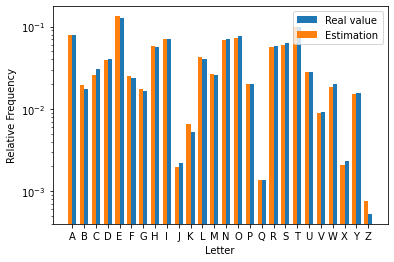

In [70]:
fig, ax = plot_rel_freqs(fix_estim, 'en', compare='det')
ax.set_yscale('log')
fig.savefig('./results/plots/05_fix_estim_compar_en', dpi=300)

In [71]:
print_max_freqs(fix_estim, 'fr', n=5, compare='det')

E  46736  0.1754  real: 45127
A  22544  0.0846  real: 21969
S  21488  0.0806  real: 21579
I  19632  0.0737  real: 19715
N  19440  0.0729  real: 20058


In [72]:
print_min_freqs(fix_estim, 'fr', n=5, compare='det')

K     80  0.0003  real: 81
W    144  0.0005  real: 104
Z    336  0.0013  real: 441
Y    576  0.0022  real: 702
J   1120  0.0042  real: 1039


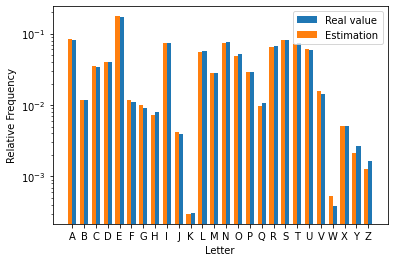

In [73]:
fig, ax = plot_rel_freqs(fix_estim, 'fr', compare='det')
ax.set_yscale('log')
fig.savefig('./results/plots/05_fix_estim_compar_fr', dpi=300)

### Compare counter sizes

In [74]:
d = det_results['pt'].ravel()
d, d.dtype

(array([37584,  3183, 11270, 14444, 36029,  2666,  3250,  3474, 16980,
          849,    73,  9073, 12923, 14216, 28623,  8339,  3137, 18555,
        22100, 13684, 11252,  4301,   100,   813,   214,  1107]),
 dtype('int64'))

In [75]:
arr1 = d.astype('uint16')
arr1

array([37584,  3183, 11270, 14444, 36029,  2666,  3250,  3474, 16980,
         849,    73,  9073, 12923, 14216, 28623,  8339,  3137, 18555,
       22100, 13684, 11252,  4301,   100,   813,   214,  1107],
      dtype=uint16)

In [76]:
f = fix_results['pt'][:,0].ravel()
f, f.dtype

(array([2313,  200,  735,  896, 2270,  179,  205,  220, 1093,   61,    4,
         567,  827,  859, 1807,  513,  198, 1104, 1346,  858,  642,  260,
           4,   35,   14,   80]),
 dtype('int64'))

In [77]:
arr2 = f.astype('uint16')
arr2

array([2313,  200,  735,  896, 2270,  179,  205,  220, 1093,   61,    4,
        567,  827,  859, 1807,  513,  198, 1104, 1346,  858,  642,  260,
          4,   35,   14,   80], dtype=uint16)

In [78]:
arr1.nbytes

52

In [79]:
arr2.nbytes

52

## Morris counter

In [80]:
with open('./results/dec_prob_counter_x1000.json', 'r') as f: 
    dec_prob_results = json.load(f)  
dec_results = dict_to_np(dec_prob_results)

In [81]:
with open('./results/dec_prob_counter_x10000.json', 'r') as f: 
    dec_prob_results = json.load(f)    
dec_results_10000 = dict_to_np(dec_prob_results)

In [82]:
with open('./results/dec_prob_counter_x100.json', 'r') as f: 
    dec_prob_results = json.load(f)    
dec_results_100 = dict_to_np(dec_prob_results)

### Distributions

In [83]:
sample = dec_results['pt'][0,:]  # counts of A in PT
sample.shape

(1000,)

In [84]:
min(sample), max(sample)

(16, 22)

In [85]:
np.mean(sample), np.std(sample)

(18.361, 0.9750276919144399)

In [86]:
sample_10000 = dec_results_10000['pt'][0,:]  # counts of A in PT
sample_10000.shape

(10000,)

In [87]:
min(sample_10000), max(sample_10000)

(15, 22)

In [88]:
np.mean(sample_10000), np.std(sample_10000)

(18.3565, 0.9668545650717072)

In [89]:
sample_100 = dec_results_100['pt'][0,:]
sample_100.shape

(100,)

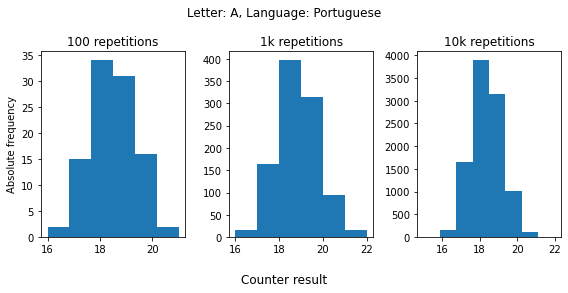

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
fig.suptitle('Letter: A, Language: Portuguese')
axes[0].set_ylabel('Absolute frequency')
axes[0].hist(sample_100, bins=6)
axes[0].set_title('100 repetitions')
axes[1].hist(sample, bins=6)
axes[1].set_title('1k repetitions')
axes[2].hist(sample_10000, bins=8);
axes[2].set_title('10k repetitions')
fig.supxlabel('Counter result');

fig.tight_layout()

fig.savefig('./results/plots/06_dec_dist_A', dpi=300)

In [91]:
idx_K = ord('K')-ord('A')
sample2 = dec_results['pt'][idx_K,:]  # counts of K in PT

In [92]:
min(sample2), max(sample2)

(4, 10)

In [93]:
np.mean(sample2), np.std(sample2)

(7.04, 0.9941830817309254)

In [94]:
sample2_10000 = dec_results_10000['pt'][idx_K,:]  # counts of K in PT

In [95]:
min(sample2_10000), max(sample2_10000)

(4, 11)

In [96]:
np.mean(sample2_10000), np.std(sample2_10000)

(7.0186, 0.9469181802035486)

In [97]:
sample2_100 = dec_results_100['pt'][idx_K,:]
sample2_100.shape

(100,)

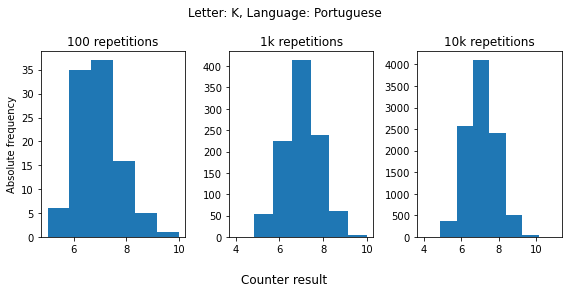

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
fig.suptitle('Letter: K, Language: Portuguese')
axes[0].set_ylabel('Absolute frequency')
axes[0].hist(sample2_100, bins=6)
axes[0].set_title('100 repetitions')
axes[1].hist(sample2, bins=7)
axes[1].set_title('1k repetitions')
axes[2].hist(sample2_10000, bins=8);
axes[2].set_title('10k repetitions')
fig.supxlabel('Counter result');

fig.tight_layout()

fig.savefig('./results/plots/06_dec_dist_K', dpi=300)

### Expected values

In [99]:
dec_expect = {}
for lang in ('pt', 'en', 'fr'):
    dec_expect[lang] = dec_results[lang].mean(axis=1)

In [100]:
dec_expect['pt'].shape

(26,)

In [101]:
teo_dec_expect = {}
sqrt3 = np.sqrt(3)
for lang in ('pt', 'en', 'fr'):
    teo_dec_expect[lang] = np.log(det_results[lang]*(sqrt3-1)+sqrt3-1)/np.log(sqrt3)

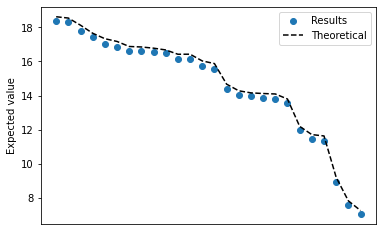

In [102]:
fig, ax = plot_expected_values(dec_expect, teo_dec_expect, 'pt')
ax.set_yscale('linear')
ax.set_ylabel('Expected value');
fig.savefig('./results/plots/07_dec_expected_pt')

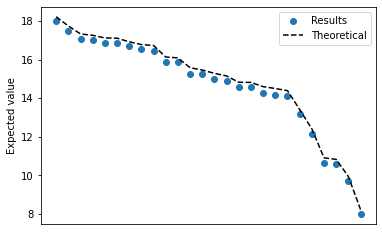

In [103]:
fig, ax = plot_expected_values(dec_expect, teo_dec_expect, 'en')
ax.set_yscale('linear')
ax.set_ylabel('Expected value');
fig.savefig('./results/plots/07_dec_expected_en')

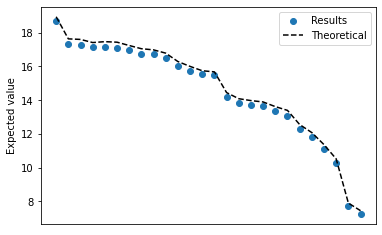

In [104]:
fig, ax = plot_expected_values(dec_expect, teo_dec_expect, 'fr')
ax.set_yscale('linear')
ax.set_ylabel('Expected value');
fig.savefig('./results/plots/07_dec_expected_fr')

### Analyze top and bottom leters

In [105]:
dec_estim = {}
for lang in ('pt', 'en', 'fr'):
    dec_estim[lang] = (sqrt3**dec_results[lang][:,0]-sqrt3)/(sqrt3-1)

In [106]:
print_max_freqs(dec_estim, 'pt', n=9, compare='det')

A  46568  0.1674  real: 37584
S  46568  0.1674  real: 22100
O  46568  0.1674  real: 28623
E  46568  0.1674  real: 36029
R  15521  0.0558  real: 18555
N  15521  0.0558  real: 14216
I  15521  0.0558  real: 16980
M  15521  0.0558  real: 12923
L   8960  0.0322  real: 9073


In [107]:
print_min_freqs(dec_estim, 'pt', n=8, compare='det')

W     61  0.0002  real: 100
K    189  0.0007  real: 73
Y    329  0.0012  real: 214
X    572  0.0021  real: 813
Z    572  0.0021  real: 1107
Q    993  0.0036  real: 3137
V    993  0.0036  real: 4301
J   1722  0.0062  real: 849


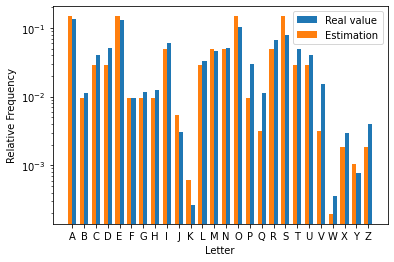

In [108]:
fig, ax = plot_rel_freqs(dec_estim, 'pt', compare='det')
ax.set_yscale('log')
fig.savefig('./results/plots/08_dec_estim_compar_pt', dpi=300)

In [109]:
print_max_freqs(dec_estim, 'en', n=7, compare='det')

O  46568  0.1976  real: 17888
A  26885  0.1141  real: 18575
E  26885  0.1141  real: 30350
I  26885  0.1141  real: 16470
D  15521  0.0659  real: 9394
H  15521  0.0659  real: 13382
T  15521  0.0659  real: 23325


In [110]:
print_min_freqs(dec_estim, 'en', n=5, compare='det')

Z     61  0.0003  real: 124
Q    189  0.0008  real: 319
X    329  0.0014  real: 544
J    329  0.0014  real: 520
K    572  0.0024  real: 1243


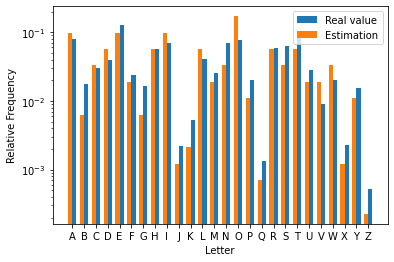

In [111]:
fig, ax = plot_rel_freqs(dec_estim, 'en', compare='det')
ax.set_yscale('log')
fig.savefig('./results/plots/08_dec_estim_compar_en', dpi=300)

In [112]:
print_max_freqs(dec_estim, 'fr', n=10, compare='det')

E 139709  0.5243  real: 45127
T  26885  0.1009  real: 19480
I  26885  0.1009  real: 19715
U  15521  0.0582  real: 15944
S  15521  0.0582  real: 21579
R  15521  0.0582  real: 17698
O  15521  0.0582  real: 13799
N  15521  0.0582  real: 20058
L  15521  0.0582  real: 15359
A   8960  0.0336  real: 21969


In [113]:
print_min_freqs(dec_estim, 'fr', n=5, compare='det')

K    108  0.0004  real: 81
W    189  0.0007  real: 104
Z    329  0.0012  real: 441
Y    329  0.0012  real: 702
Q    572  0.0021  real: 2818


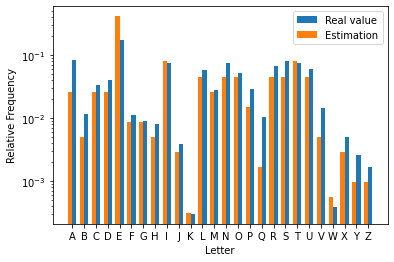

In [114]:
fig, ax = plot_rel_freqs(dec_estim, 'fr', compare='det')
ax.set_yscale('log')
fig.savefig('./results/plots/08_dec_estim_compar_fr', dpi=300)

### Tables

In [115]:
(sqrt3**10-sqrt3)/(sqrt3-1)

329.578147715834

In [116]:
def create_dec_table(results, lang, n=5):        
    data = {
        'Letter': letter_labels,
        'Exact counts': det_results[lang].ravel(),
        'Average estimate': (sqrt3**np.mean(results[lang], axis=1)-sqrt3)/(sqrt3-1), 
        'Minimum estimate': (sqrt3**np.min(results[lang], axis=1)-sqrt3)/(sqrt3-1),
        'Maximum estimate': (sqrt3**np.max(results[lang], axis=1)-sqrt3)/(sqrt3-1),
        'Standard deviation': np.std((sqrt3**results[lang]-sqrt3)/(sqrt3-1), axis=1),        
    }    
    
    df = pd.DataFrame(data)
    df['Average relative error'] = np.abs(df['Average estimate'] - df['Exact counts'])/df['Exact counts'] * 100
    df['Maximum relative error'] = np.max((np.abs(df['Minimum estimate'] - df['Exact counts'])/df['Exact counts'],
                                           np.abs(df['Maximum estimate'] - df['Exact counts'])/df['Exact counts']), 
                                           axis=0) * 100
    
    return df
        

In [117]:
df_pt = create_dec_table(dec_results, 'pt')
df_pt = df_pt.sort_values(by='Average estimate', ascending=False)
df_pt

,Letter,Exact counts,Average estimate,Minimum estimate,Maximum estimate,Standard deviation,Average relative error,Maximum relative error
0,A,37584,32782.276673,8960.126649,241984.936179,24905.302689,12.775977,543.850937
4,E,36029,31424.515374,8960.126649,241984.936179,22122.895818,12.779940,571.639335
14,O,28623,23720.013262,5172.131533,139709.068043,15860.344247,17.129535,388.100716
18,S,22100,19420.896360,5172.131533,80660.068043,12420.389443,12.122641,264.977683
17,R,18555,15892.158764,2985.131533,80660.068043,10420.618641,14.351071,334.707993
8,I,16980,14340.525395,2985.131533,80660.068043,9914.998670,15.544609,375.029847
3,D,14444,12645.181705,2985.131533,80660.068043,8310.336776,12.453741,458.433038
13,N,14216,12377.115686,1722.466494,80660.068043,8909.704281,12.935315,467.389336
19,T,13684,12028.511618,2985.131533,80660.068043,8534.396248,12.097986,489.448027
12,M,12923,11587.413845,2985.131533,80660.068043,8661.170107,10.334954,524.159004


In [118]:
idxs = np.r_[0:5, -5:0]
df_pt.iloc[idxs]

,Letter,Exact counts,Average estimate,Minimum estimate,Maximum estimate,Standard deviation,Average relative error,Maximum relative error
0,A,37584,32782.276673,8960.126649,241984.936179,24905.302689,12.775977,543.850937
4,E,36029,31424.515374,8960.126649,241984.936179,22122.895818,12.779940,571.639335
14,O,28623,23720.013262,5172.131533,139709.068043,15860.344247,17.129535,388.100716
18,S,22100,19420.896360,5172.131533,80660.068043,12420.389443,12.122641,264.977683
17,R,18555,15892.158764,2985.131533,80660.068043,10420.618641,14.351071,334.707993
9,J,849,731.784571,189.282032,5172.131533,497.263716,13.806293,509.202772
23,X,813,687.221259,108.282032,2985.131533,456.655216,15.470940,267.174850
24,Y,214,180.941803,34.516660,993.466494,120.557583,15.447756,364.236679
22,W,100,84.764418,18.928203,993.466494,64.894506,15.235582,893.466494
10,K,73,62.935841,9.928203,329.578148,45.478929,13.786519,351.476915


In [119]:
with open('./results/tables/dec_table_short_pt.tex', 'w') as f:
    (df_pt.iloc[idxs]).to_latex(f, float_format="{:0.2f}".format, index=False)

In [120]:
with open('./results/tables/dec_table_pt.tex', 'w') as f:
    df_pt.to_latex(f, float_format="{:0.2f}".format, index=False)

In [121]:
df_en = create_dec_table(dec_results, 'en')
df_en = df_en.sort_values(by='Average estimate', ascending=False)
df_en

,Letter,Exact counts,Average estimate,Minimum estimate,Maximum estimate,Standard deviation,Average relative error,Maximum relative error
4,E,30350,26840.840115,5172.131533,139709.068043,20030.710468,11.562306,360.326419
19,T,23325,20060.697767,5172.131533,139709.068043,13753.674303,13.994865,498.967066
0,A,18575,16289.948149,2985.131533,80660.068043,11267.011128,12.301760,334.239936
14,O,17888,15470.047969,5172.131533,80660.068043,10199.997686,13.517174,350.917196
13,N,16591,14348.406198,2985.131533,139709.068043,11698.239265,13.516930,742.077440
8,I,16470,14324.776771,2985.131533,80660.068043,9667.034159,13.025035,389.739332
18,S,14875,13119.327472,2985.131533,80660.068043,9006.341190,11.802841,442.252558
17,R,13723,11962.606444,2985.131533,139709.068043,9302.017987,12.828052,918.065059
7,H,13382,11448.197316,2985.131533,80660.068043,8002.944255,14.450775,502.750471
11,L,9637,8393.008961,1722.466494,46568.111997,5732.181261,12.908489,383.222082


In [122]:
with open('./results/tables/dec_table_en.tex', 'w') as f:
    df_en.to_latex(f, float_format="{:0.2f}".format, index=False)

In [123]:
df_fr = create_dec_table(dec_results, 'fr')
df_fr = df_fr.sort_values(by='Average estimate', ascending=False)
df_fr

,Letter,Exact counts,Average estimate,Minimum estimate,Maximum estimate,Standard deviation,Average relative error,Maximum relative error
4,E,45127,39644.825790,8960.126649,241984.936179,27774.599836,12.148324,436.230940
0,A,21969,18842.859647,5172.131533,139709.068043,13492.603564,14.229780,535.937312
18,S,21579,17845.399032,5172.131533,139709.068043,12096.016485,17.302011,547.430687
19,T,19480,17096.846551,2985.131533,80660.068043,11418.267483,12.233847,314.066058
13,N,20058,17087.456428,5172.131533,80660.068043,11961.650365,14.809770,302.134151
8,I,19715,16569.757268,2985.131533,139709.068043,11674.781650,15.953552,608.643510
17,R,17698,15487.055494,2985.131533,80660.068043,10776.797720,12.492623,355.758097
20,U,15944,13581.369228,2985.131533,80660.068043,8910.714726,14.818306,405.896061
11,L,15359,13315.389124,2985.131533,80660.068043,9746.851924,13.305625,425.164842
14,O,13799,11864.424994,2985.131533,80660.068043,8465.673700,14.019675,484.535604


In [124]:
n = np.arange(1, 10000)
k = np.floor(np.log2(n))+1
k2 = np.log2(n+1)
estim = 2**k-1
estim2 = 2**k2-1

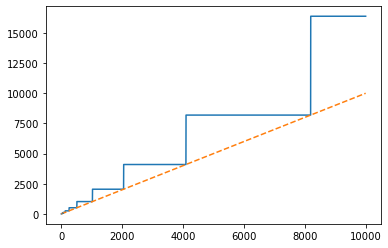

In [125]:
plt.plot(n, estim)
plt.plot(n, n, '--')
ax = plt.gca()
ax.vlines(73, ymin=0, ymax=100);

In [126]:
with open('./results/dec_prob_counter_x900.json', 'r') as f: 
    dec_prob_results = json.load(f)    
dec_results_900 = dict_to_np(dec_prob_results)

In [127]:
t = dec_results_900['pt']

In [128]:
expect = {}
for lang in ('pt', 'en', 'fr'):
    expect[lang] = dec_results_900[lang].mean(axis=1)

In [129]:
teo_expect = {}
for lang in ('pt', 'en', 'fr'):
    teo_expect[lang] = np.log2(det_results[lang]+1)

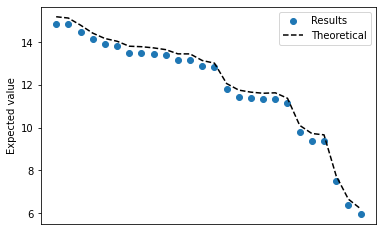

In [130]:
fig, ax = plot_expected_values(expect, teo_expect, 'pt')
ax.set_yscale('linear')
ax.set_ylabel('Expected value');